<a href="https://colab.research.google.com/github/Savvy-Slowley/Sales_Predictions-PROJECT-/blob/main/Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Import the TTS from sklearn
from sklearn.model_selection import train_test_split
# Make a linear regression model
from sklearn.linear_model import LinearRegression
#Coefficient of Determination
from sklearn.metrics import r2_score
#Mean Absolute Error 
from sklearn.metrics import mean_absolute_error
#Mean Squared Error 
from sklearn.metrics import mean_squared_error
#Import the Decision tree
from sklearn.tree import DecisionTreeRegressor
#Import the Bagging regressor
from sklearn.ensemble import BaggingRegressor
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
filename = '/content/sales_predictions.csv'

In [4]:
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# Rows,Columns
df.shape

(8523, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
#Checking for duplicates
df.duplicated().any()

False

In [8]:
#Seeing which columns have NaN values and the quantity
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
#https://www.kite.com/python/answers/how-to-find-rows-with-nan-values-in-a-pandas-dataframe-in-python
#This is a block of code that makes you see which rows have NAN values
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.2,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.2,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680


In [10]:
#Running a value count for Outlet Size because it has missing values that needs to be imputed
# I want to rename the data from high to large
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [11]:
#There is a trend between Outlet Size and Outlet Location Type where 'Tier 3'== 'Medium', 'Tier 1' == 'Small' & 'Tier 2' == 'High'
df['Outlet_Size'] = np.where(((df['Outlet_Location_Type'] == 'Tier 3')), 'Medium', df['Outlet_Size'])  
df['Outlet_Size'] = np.where(((df['Outlet_Location_Type'] == 'Tier 1')), 'Small', df['Outlet_Size'])  
df['Outlet_Size'] = np.where(((df['Outlet_Location_Type'] == 'Tier 2')), 'Large', df['Outlet_Size'])  
#Identifies the case to apply to
#This is the value that is inserted
#This is the column that is affected

In [12]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Small,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Medium,Tier 3,Supermarket Type1,994.7052


In [13]:
# See if those NaN values changed
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [14]:
#Now an analysis has to be conducted to understand how to impute data 

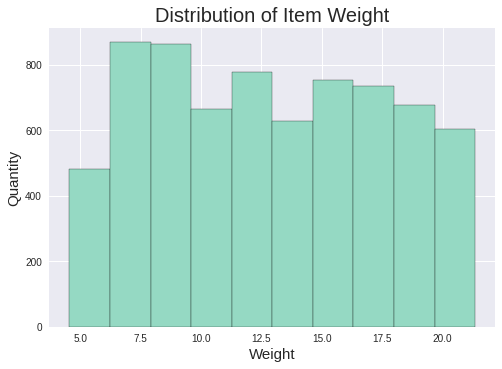

In [15]:
plt.style.use('seaborn')
df['Item_Weight'].hist(edgecolor='k', color='#95D9C3');
plt.xlabel('Weight', fontsize = 15);
plt.ylabel('Quantity', fontsize = 15);
plt.title('Distribution of Item Weight', fontsize = 20);

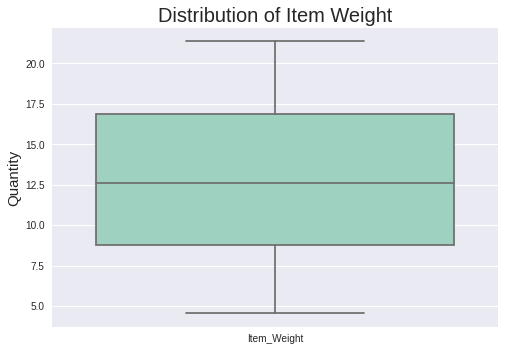

In [16]:
plt.style.use('seaborn')
sns.boxplot(data=df[['Item_Weight']], color='#95D9C3');
plt.ylabel('Quantity', fontsize = 15);
plt.title('Distribution of Item Weight', fontsize = 20);

In [17]:
#Because the distribution in this graph is even I will use the mean fill to put all the NaN values 

In [18]:
df['Item_Weight'].fillna(int(df['Item_Weight'].mean()), inplace=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Small,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Medium,Tier 3,Supermarket Type1,994.7052


In [19]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [20]:
#Quickly checked all the value counts for each column to see if there is any data imputed incorrectly

In [21]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [22]:
#LF is suppose to be Low Fat and reg is suppose to be Regular

In [23]:
df = df.replace(['LF'], 'Low Fat')

In [24]:
df = df.replace(['reg'], 'Regular')

In [25]:
df = df.replace(['low fat'], 'Low Fat')

In [26]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [27]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.710428,0.066132,140.992782,1997.831867,2181.288914
std,4.238481,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


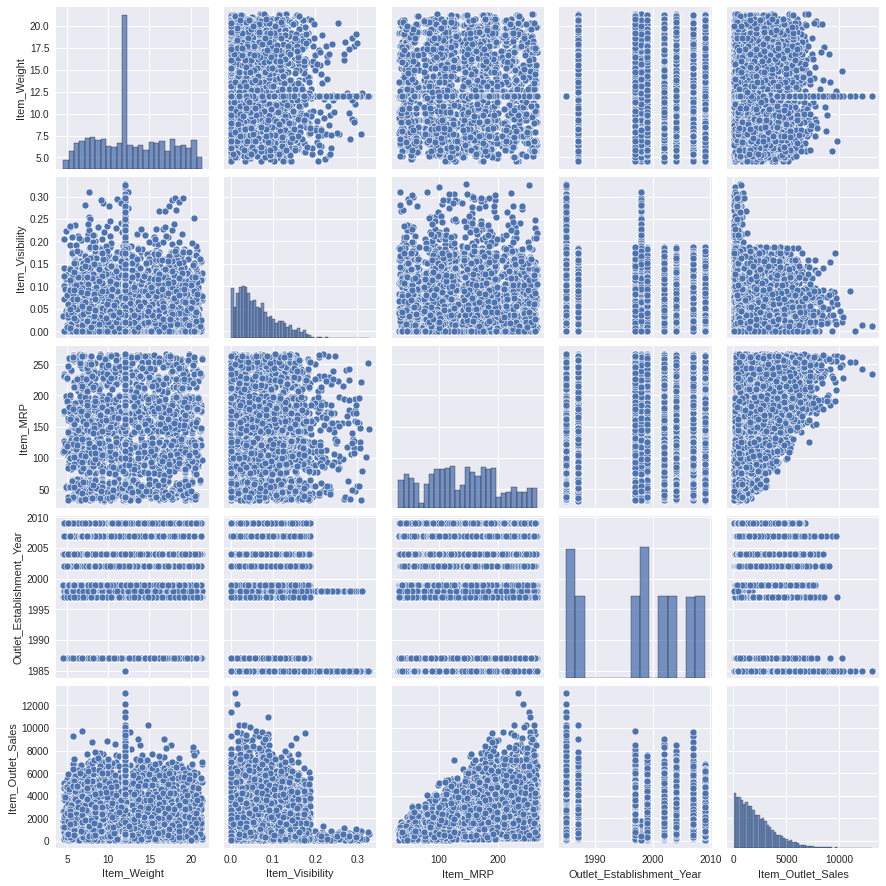

In [28]:
#Quick view of alot of different plots
sns.pairplot(df);

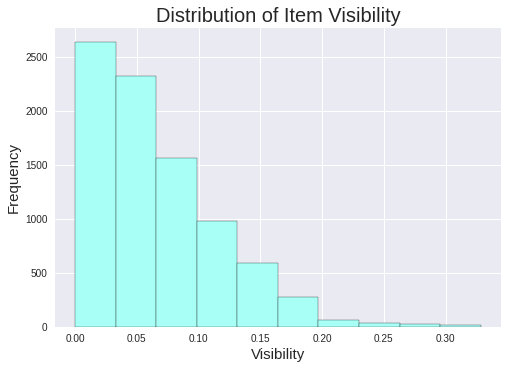

In [29]:
plt.style.use('seaborn-bright');
df['Item_Visibility'].hist(edgecolor='k', color='#A7FFF6');
plt.title('Distribution of Item Visibility', fontsize = 20);
plt.xlabel('Visibility', fontsize = 15);
plt.ylabel('Frequency', fontsize = 15);

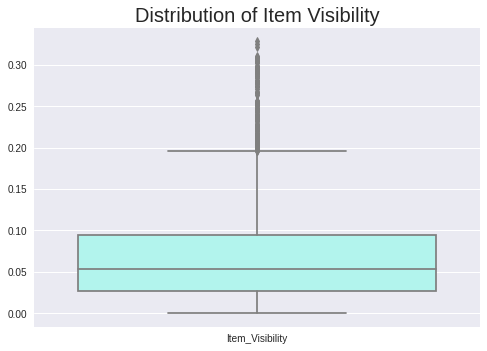

In [30]:
plt.style.use('seaborn-bright');
sns.boxplot(data=df[['Item_Visibility']], color='#A7FFF6');
plt.title('Distribution of Item Visibility', fontsize = 20);

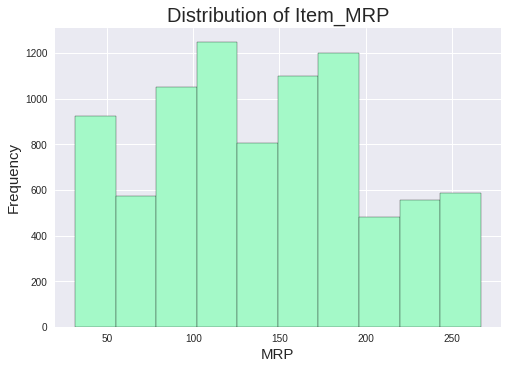

In [31]:
plt.style.use('tableau-colorblind10');
df['Item_MRP'].hist(edgecolor='k', color='#A4F9C8');
plt.title('Distribution of Item_MRP', fontsize = 20);
plt.xlabel('MRP', fontsize = 15);
plt.ylabel('Frequency', fontsize = 15);

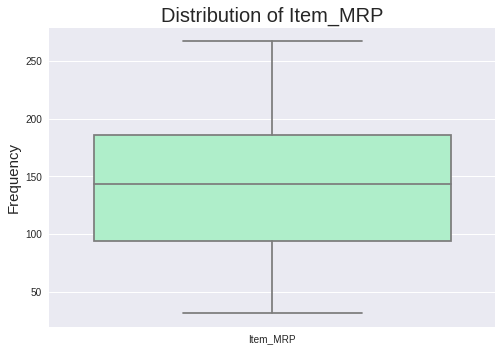

In [32]:
plt.style.use('tableau-colorblind10');
sns.boxplot(data=df[['Item_MRP']], color='#A4F9C8');
plt.title('Distribution of Item_MRP', fontsize = 20);
plt.ylabel('Frequency', fontsize = 15);

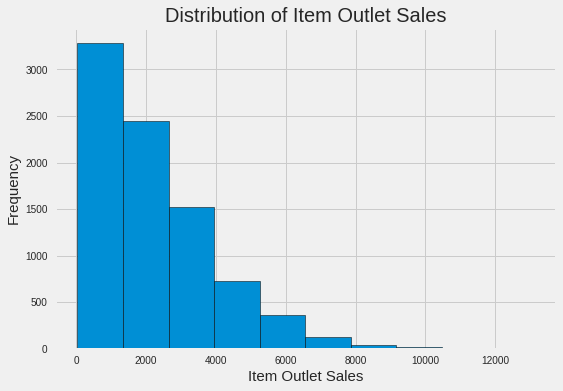

In [33]:
plt.style.use('fivethirtyeight');
df['Item_Outlet_Sales'].hist(edgecolor='k');
plt.title('Distribution of Item Outlet Sales', fontsize = 20);
plt.xlabel('Item Outlet Sales', fontsize = 15);
plt.ylabel('Frequency', fontsize = 15);

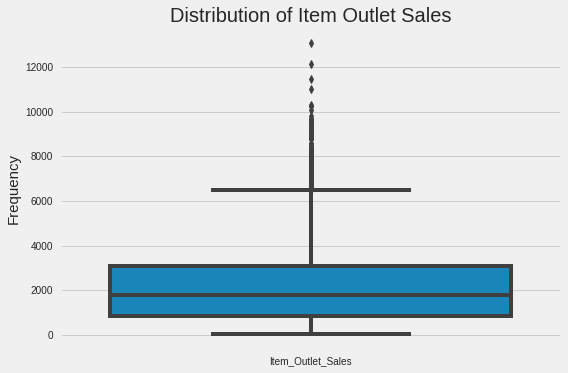

In [34]:
plt.style.use('fivethirtyeight');
sns.boxplot(data=df[['Item_Outlet_Sales']]);
plt.title('Distribution of Item Outlet Sales', fontsize = 20);
plt.ylabel('Frequency', fontsize = 15);

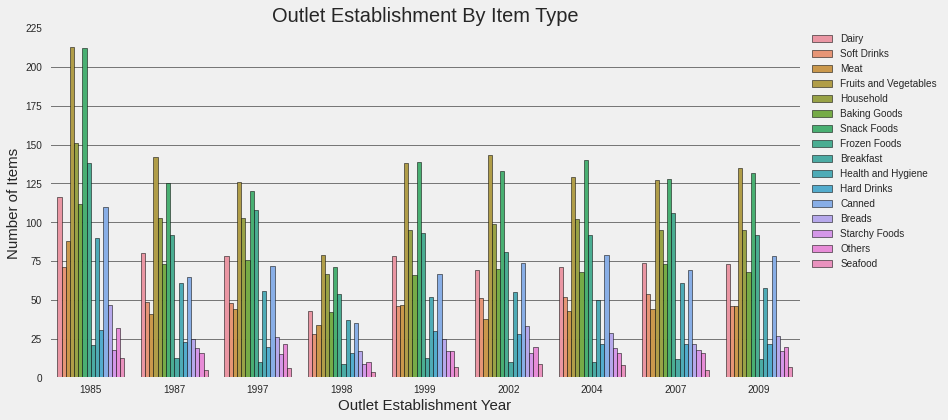

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(x='Outlet_Establishment_Year',hue='Item_Type', edgecolor='k' ,data=df);
plt.legend(loc= (1.01, .3))
plt.title('Outlet Establishment By Item Type', fontsize = 20);
plt.xlabel('Outlet Establishment Year', fontsize = 15);
plt.ylabel('Number of Items', fontsize = 15);
plt.ylim(bottom=0, top=225); 
plt.grid(axis='y', color='k', alpha=.5) 

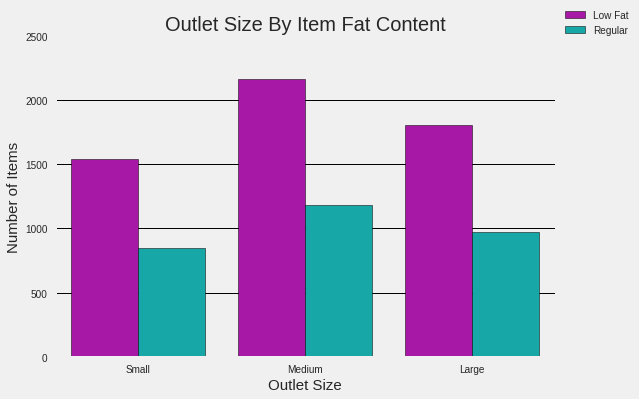

In [36]:
plt.style.use('fivethirtyeight');
sns.countplot(x='Outlet_Size',hue='Item_Fat_Content',edgecolor='k' ,data=df, palette=["m", "c"]);
plt.legend(loc= (1.01, .99))
plt.title('Outlet Size By Item Fat Content', fontsize = 20);
plt.xlabel('Outlet Size', fontsize = 15);
plt.ylabel('Number of Items', fontsize = 15);
plt.ylim(bottom=0, top=2500);  
plt.grid(axis='y', color='k')

In [37]:
corr = df.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.019059,0.025351,0.044968,0.005361
Item_Visibility,-0.019059,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.025351,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.044968,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.005361,-0.128625,0.567574,-0.049135,1.000000


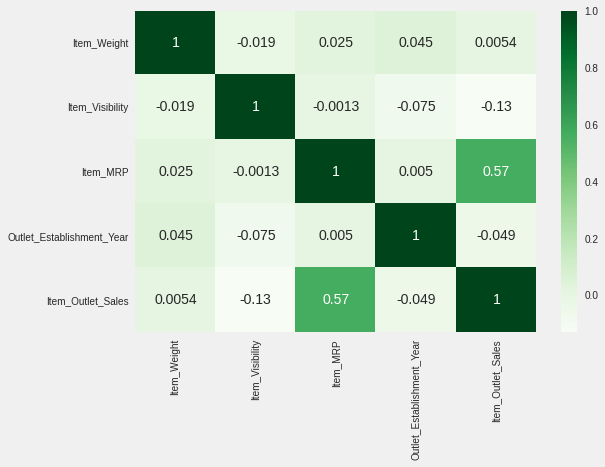

In [38]:
sns.heatmap(corr, cmap='Greens', annot=True);

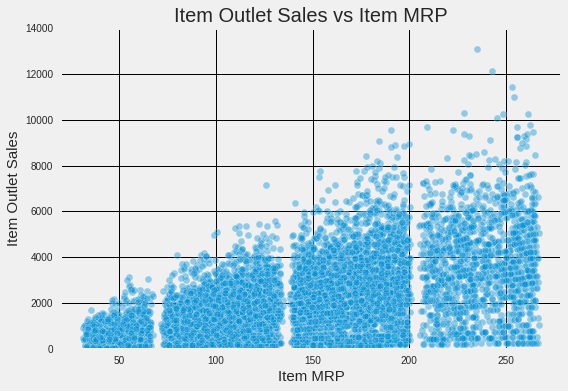

In [39]:
# Item MRP and Item Outlet Sales have a high correlation
sns.scatterplot(x = df['Item_MRP'], y = df['Item_Outlet_Sales'], alpha=.4);
plt.title('Item Outlet Sales vs Item MRP', fontsize = 20);
plt.xlabel("Item MRP", fontsize = 15);
plt.ylabel("Item Outlet Sales", fontsize = 15);
plt.ylim(bottom=0, top=14000);  
plt.grid(color='k')

In [40]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [41]:
df_dummy = df
df_dummy.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Small,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Medium,Tier 3,Supermarket Type1,994.7052


In [42]:
df_dummy = pd.get_dummies(df_dummy, columns = ['Outlet_Size','Item_Fat_Content','Item_Type','Outlet_Location_Type', 'Outlet_Type'])
df_dummy.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Size_Large,Outlet_Size_Medium,Outlet_Size_Small,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,3735.1380,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,443.4228,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,2097.2700,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,FDX07,19.20,0.000000,182.0950,OUT010,1998,732.3800,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,1987,994.7052,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0


In [43]:
df_dummyX = df_dummy.drop(columns=['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier'])

In [44]:
# Assigning the "Item_Outlet_Sales" as the target
y = df_dummy['Item_Outlet_Sales']
X = df_dummyX

In [45]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [46]:
#Checking target (Rows,Columns)
y.shape

(8523,)

In [47]:
#Checking features (Rows,Columns)
X.shape

(8523, 32)

In [48]:
#Making sure 75% of the data is in the training 
print('X training:', len(X_train))
print('y training:', len(y_train))

X training: 6392
y training: 6392


In [49]:
#Making sure 25% of the data is in the testing pile
print('X testing:', len(X_test))
print('y testing:', len(y_test))

X testing: 2131
y testing: 2131


In [50]:
#Baseline Coefficient of Determination Training(R^2)
print('Baseline Coefficient of Determination Training(R^2):', r2_score(y_train, [y_train.mean()]*len(y_train)))
#Baseline Coefficient of Determination Testing(R^2)
print('Baseline Coefficient of Determination Testing(R^2):', r2_score(y_test, [y_train.mean()]*len(y_test)))

Baseline Coefficient of Determination Training(R^2): 0.0
Baseline Coefficient of Determination Testing(R^2): -0.004772483978720654


In [51]:
#Baseline Root Mean Squared Error Training(RMSE)
print('Baseline Root Mean Squared Error Training:', np.sqrt(mean_squared_error(y_train, [y_train.mean()]*len(y_train))))
#Baseline Root Mean Squared Error Testing(RMSE)
print('Baseline Root Mean Squared Error Testing:', np.sqrt(mean_squared_error(y_test, [y_train.mean()]*len(y_test))))

Baseline Root Mean Squared Error Training: 1720.306863477141
Baseline Root Mean Squared Error Testing: 1664.9758144520795


In [52]:
#Linear Regression

In [53]:
# Make a linear regression instance
reg = LinearRegression()

In [54]:
#Model is learning the relationship between X and y
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
#Compare our test and train score to make sure our model make good predictons and doesn't overfit(R^2)
reg_test_score = reg.score(X_test, y_test)
print('Linear Regression Test Score:', reg_test_score)
reg_train_score = reg.score(X_train, y_train)
print('Linear Regression Train Score:',reg_train_score)

Linear Regression Test Score: 0.565852830468762
Linear Regression Train Score: 0.5605674972816823


In [56]:
#To predict all values on the training data
reg_train_preds = reg.predict(X_train)
#To predict all values on the testing data
reg_test_preds = reg.predict(X_test)

In [57]:
#Coefficient of Determination Training(R^2)
print('Linear Regression Coefficient of Determination Training:', r2_score(y_train, reg.predict(X_train)))
#Coefficient of Determination Test(R^2)
print('Linear Regression Coefficient of Determination Test:', r2_score(y_test, reg.predict(X_test)))

Linear Regression Coefficient of Determination Training: 0.5605674972816823
Linear Regression Coefficient of Determination Test: 0.565852830468762


In [58]:
#Mean Absolute Error Training(MAE)
print('Linear Regression Mean Absolute Error Training:', mean_absolute_error(y_train, reg.predict(X_train)))
#Mean Absolute Error Test(MAE)
print('Linear Regression Mean Absolute Error Test:', mean_absolute_error(y_test, reg.predict(X_test)))

Linear Regression Mean Absolute Error Training: 847.5135832473072
Linear Regression Mean Absolute Error Test: 805.3766121929156


In [59]:
#Mean Squared Error Training(MSE)
print('Linear Regression Mean Squared Error Training:', mean_squared_error(y_train, reg.predict(X_train)))
#Mean Squared Error Testing(MSE)
print('Linear Regression Mean Squared Error Testing:', mean_squared_error(y_test, reg.predict(X_test)))

Linear Regression Mean Squared Error Training: 1300481.026924108
Linear Regression Mean Squared Error Testing: 1197802.180302231


In [60]:
#Root Mean Squared Error Training(RMSE)
print('Linear Regression Root Mean Squared Error Training:', np.sqrt(mean_squared_error(y_train, reg.predict(X_train))))
#Root Mean Squared Error Testing(RMSE)
print('Linear Regression Root Mean Squared Error Testing:', np.sqrt(mean_squared_error(y_test, reg.predict(X_test))))

Linear Regression Root Mean Squared Error Training: 1140.3863498499568
Linear Regression Root Mean Squared Error Testing: 1094.4414924070775


In [61]:
#Slope Coefficient (Coefficient of the features) and the y-intercept
print('Slope Coefficients:', reg.coef_)
print('y-intercept:', reg.intercept_)

Slope Coefficients: [-1.85151909e+00 -4.22955185e+02  1.57185328e+01  9.67997022e-01
 -4.17013980e+00  6.49461290e+00 -2.32447310e+00 -3.15041212e+01
  3.15041212e+01 -1.72486241e+01 -4.70699300e+01  2.97040559e+01
  8.65868174e+00 -1.23104128e+02 -1.97065709e+01  2.62413420e+01
 -7.71647638e+00  8.99336013e+00 -1.40068792e+01 -2.68213155e+01
 -4.87921987e+01  3.01090698e+02 -3.78377609e+01 -5.96679881e+01
  2.72837337e+01 -2.32447310e+00 -4.17013980e+00  6.49461290e+00
 -1.73120752e+03  2.26577003e+02 -1.12453703e+02  1.61708422e+03]
y-intercept: -1979.1103275247124


In [62]:
df_dummyX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Outlet_Establishment_Year        8523 non-null   int64  
 4   Outlet_Size_Large                8523 non-null   uint8  
 5   Outlet_Size_Medium               8523 non-null   uint8  
 6   Outlet_Size_Small                8523 non-null   uint8  
 7   Item_Fat_Content_Low Fat         8523 non-null   uint8  
 8   Item_Fat_Content_Regular         8523 non-null   uint8  
 9   Item_Type_Baking Goods           8523 non-null   uint8  
 10  Item_Type_Breads                 8523 non-null   uint8  
 11  Item_Type_Breakfast              8523 non-null   uint8  
 12  Item_Type_Canned    

In [63]:
importance = reg.coef_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -1.85152
Feature: 1, Score: -422.95518
Feature: 2, Score: 15.71853
Feature: 3, Score: 0.96800
Feature: 4, Score: -4.17014
Feature: 5, Score: 6.49461
Feature: 6, Score: -2.32447
Feature: 7, Score: -31.50412
Feature: 8, Score: 31.50412
Feature: 9, Score: -17.24862
Feature: 10, Score: -47.06993
Feature: 11, Score: 29.70406
Feature: 12, Score: 8.65868
Feature: 13, Score: -123.10413
Feature: 14, Score: -19.70657
Feature: 15, Score: 26.24134
Feature: 16, Score: -7.71648
Feature: 17, Score: 8.99336
Feature: 18, Score: -14.00688
Feature: 19, Score: -26.82132
Feature: 20, Score: -48.79220
Feature: 21, Score: 301.09070
Feature: 22, Score: -37.83776
Feature: 23, Score: -59.66799
Feature: 24, Score: 27.28373
Feature: 25, Score: -2.32447
Feature: 26, Score: -4.17014
Feature: 27, Score: 6.49461
Feature: 28, Score: -1731.20752
Feature: 29, Score: 226.57700
Feature: 30, Score: -112.45370
Feature: 31, Score: 1617.08422


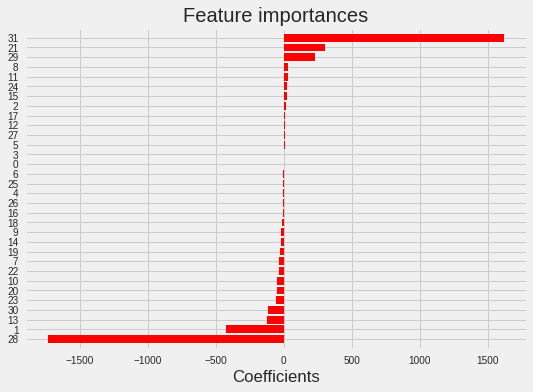

In [64]:
importances = reg.coef_
indices = np.argsort(importances)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
       color="r",  align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(X.shape[1]), indices)
plt.ylim([-1, X.shape[1]])
plt.xlabel('Coefficients')
plt.show()

In [65]:
#Outlet Type Grocery Store and Outlet Type Supermarket Type 3 are features that are most associated with higher predicted sales

In [66]:
#Decision Tree

In [67]:
# Make a Decision Tree instance
dec_tree = DecisionTreeRegressor(random_state = 42)

In [68]:
#Model is learning the relationship between X and y
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [69]:
#Predict the target values for the training set and the test test
dec_tree_train_preds = dec_tree.predict(X_train)
dec_tree_test_preds = dec_tree.predict(X_test)

In [70]:
#The depth of the decision tree
dec_tree.get_depth()

40

In [71]:
#Check leaf nodes
dec_tree.get_n_leaves()

6215

In [72]:
#Evaluate the model by seeing it's R^2
dec_tree_train_score = dec_tree.score(X_train, y_train)
dec_tree_test_score = dec_tree.score(X_test, y_test)
print('Decision Tree Train Score(Original):', dec_tree_train_score)
print('Decision Tree Test Score(Original):',dec_tree_test_score)

Decision Tree Train Score(Original): 1.0
Decision Tree Test Score(Original): 0.17838587099699954


In [73]:
#Looking at options for tuning this model
dec_tree

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [74]:
# List of values to try for max_depth:
dec_tree_max_depth_range = list(range(2, 40)) # will try every value between 2 and 40
# List to store the score for each value of max_depth:
r2 = []
for depth in dec_tree_max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)

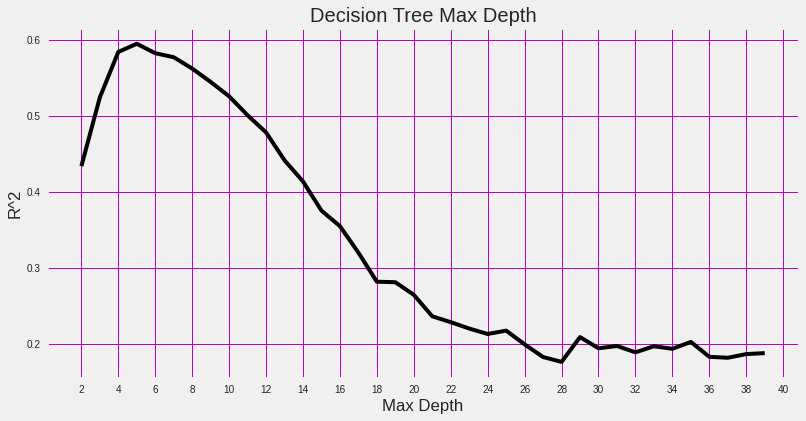

In [75]:
# Visualize which max_depth leads to the highest R^2 score
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12,6));
plt.plot(dec_tree_max_depth_range, r2, c='k');
plt.xlabel('Max Depth');
plt.ylabel('R^2');
plt.grid(c='m');
plt.locator_params(axis="x", nbins=40);
plt.title('Decision Tree Max Depth');

In [76]:
#Let's run the model with our optimized value for max_depth
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_5.fit(X_train, y_train)
dec_tree_train_5_score = dec_tree_5.score(X_train, y_train)
dec_tree_test_5_score = dec_tree_5.score(X_test, y_test)
print('Decision Tree Train Score(Optimized):', dec_tree_train_5_score)
print('Decision Tree Test Score(Optimized):',dec_tree_test_5_score)

Decision Tree Train Score(Optimized): 0.6039335724587842
Decision Tree Test Score(Optimized): 0.5947071437341442


In [77]:
dec_tree_5.feature_importances_

array([6.97936246e-05, 8.66522240e-04, 5.52375997e-01, 2.59858616e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.54197217e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.69469230e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.20968748e-01, 0.00000000e+00, 0.00000000e+00, 9.96549629e-02])

In [78]:
dec_importance = dec_tree_5.feature_importances_
for i,v in enumerate(dec_importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00007
Feature: 1, Score: 0.00087
Feature: 2, Score: 0.55238
Feature: 3, Score: 0.02599
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00008
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.32097
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.09965


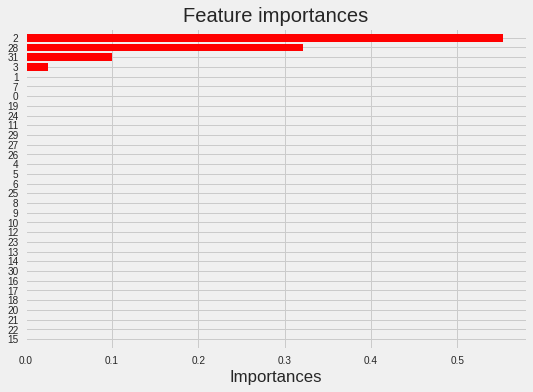

In [79]:
importances = dec_tree_5.feature_importances_
indices = np.argsort(importances)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
       color="r",  align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(X.shape[1]), indices)
plt.ylim([-1, X.shape[1]])
plt.xlabel('Importances')
plt.show()

In [80]:
#Item_MRP is the feature that is most associated with higher predicted sales

In [81]:
#Bagged Tree

In [82]:
# Make a Bagged Tree instance
bagreg = BaggingRegressor(random_state = 42)

In [83]:
# Look at the hyperparameters
bagreg

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [84]:
#Model is learning the relationship between X and y
bagreg.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [85]:
#Predict the target values for the training set and the test test
bagreg_train_preds = bagreg.predict(X_train)
bagreg_test_preds = bagreg.predict(X_test)

In [86]:
#Evaluate the model by seeing it's R^2
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)
print('Bagged Tree Train Score:',bagreg_train_score)
print('Bagged Tree Test Score:',bagreg_test_score)

Bagged Tree Train Score: 0.918204518459746
Bagged Tree Test Score: 0.5213957056291549


In [87]:
#Random Forests

In [88]:
# Make a Random Forests instance
rf = RandomForestRegressor(random_state = 42)

In [89]:
#Looking at options for tuning this model
rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [90]:
#Model is learning the relationship between X and y
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [91]:
#Predict the target values for the training set and the test test
rf_train_preds = rf.predict(X_train)
rf_test_preds = rf.predict(X_test)

In [92]:
#Evaluate the model by seeing it's R^2
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print('Random Forests Train Score(Original):',rf_train_score)
print('Random Forests Test Score(Original):',rf_test_score)

Random Forests Train Score(Original): 0.937296253075294
Random Forests Test Score(Original): 0.5454398929833535


In [93]:
# List of values to try for max_depth:
rf_max_depth_range = list(range(2, 40)) # will try every value between 2 and 40
# List to store the score for each value of max_depth:
r2 = []
for rf_depth in rf_max_depth_range:
    rf = RandomForestRegressor(max_depth = rf_depth, random_state = 42)
    rf.fit(X_train, y_train)
    score = rf.score(X_test, y_test)
    r2.append(score)

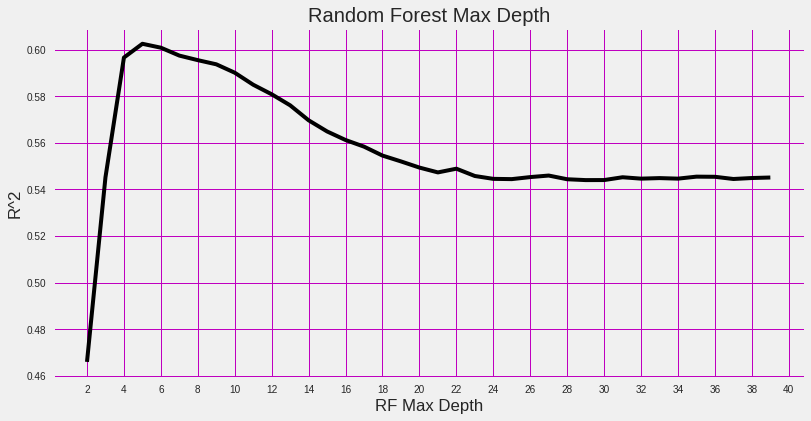

In [94]:
# Visualize which max_depth leads to the highest R^2 score
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12,6))
plt.plot(rf_max_depth_range, r2, c='k');
plt.xlabel('RF Max Depth');
plt.ylabel('R^2');
plt.grid(c='m');
plt.locator_params(axis="x", nbins=40);
plt.title('Random Forest Max Depth');

In [95]:
#Let's run the model with our optimized value for max_depth
rf_5 = RandomForestRegressor(max_depth = 5, random_state = 42)
rf_5.fit(X_train, y_train)
rf_5_train_score = rf_5.score(X_train, y_train)
rf_5_test_score = rf_5.score(X_test, y_test)
print('Random Forests Train Score(Optimized):',rf_5_train_score)
print('Random Forests Test Score(Optimized):',rf_5_test_score)

Random Forests Train Score(Optimized): 0.6105371373976064
Random Forests Test Score(Optimized): 0.6025520510628769


In [96]:
rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=39, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [97]:
rf_5_importance = rf_5.feature_importances_
for i,v in enumerate(rf_5_importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00023
Feature: 1, Score: 0.00199
Feature: 2, Score: 0.55386
Feature: 3, Score: 0.03125
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00001
Feature: 8, Score: 0.00004
Feature: 9, Score: 0.00003
Feature: 10, Score: 0.00001
Feature: 11, Score: 0.00003
Feature: 12, Score: 0.00001
Feature: 13, Score: 0.00007
Feature: 14, Score: 0.00013
Feature: 15, Score: 0.00023
Feature: 16, Score: 0.00011
Feature: 17, Score: 0.00008
Feature: 18, Score: 0.00018
Feature: 19, Score: 0.00009
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00002
Feature: 23, Score: 0.00017
Feature: 24, Score: 0.00010
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.31395
Feature: 29, Score: 0.00064
Feature: 30, Score: 0.00017
Feature: 31, Score: 0.09659


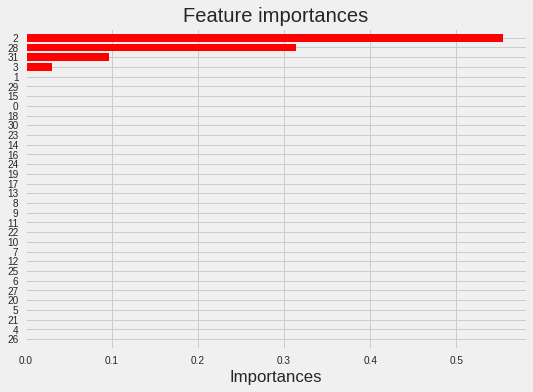

In [98]:
importances = rf_5.feature_importances_
indices = np.argsort(importances)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
       color="r",  align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(X.shape[1]), indices)
plt.ylim([-1, X.shape[1]])
plt.xlabel('Importances')
plt.show()

In [99]:
#Item_MRP is the feature that is most associated with higher predicted sales

In [100]:
#Compare R^2 values between the different models

In [101]:
print('Linear Regression Coefficient of Determination Training(R^2):',reg_train_score)
print('Linear Regression Coefficient of Determination Training(R^2):', reg_test_score)
print('')
print('Decision Tree Coefficient of Determination Training(R^2):', dec_tree_train_5_score)
print('Decision Tree Coefficient of Determination Training(R^2):',dec_tree_test_5_score)
print('')
print('Bagged Tree Coefficient of Determination Training(R^2):',bagreg_train_score)
print('Bagged Tree Coefficient of Determination Training(R^2):',bagreg_test_score)
print('')
print('Random Forests Coefficient of Determination Training(R^2):',rf_5_train_score)
print('Random Forests Coefficient of Determination Training(R^2):',rf_5_test_score)

Linear Regression Coefficient of Determination Training(R^2): 0.5605674972816823
Linear Regression Coefficient of Determination Training(R^2): 0.565852830468762

Decision Tree Coefficient of Determination Training(R^2): 0.6039335724587842
Decision Tree Coefficient of Determination Training(R^2): 0.5947071437341442

Bagged Tree Coefficient of Determination Training(R^2): 0.918204518459746
Bagged Tree Coefficient of Determination Training(R^2): 0.5213957056291549

Random Forests Coefficient of Determination Training(R^2): 0.6105371373976064
Random Forests Coefficient of Determination Training(R^2): 0.6025520510628769


In [102]:
print('Linear Regression Root Mean Squared Error Training(RMSE):', np.sqrt(mean_squared_error(y_train, reg.predict(X_train))))
print('Linear Regression Root Mean Squared Error Testing(RMSE):', np.sqrt(mean_squared_error(y_test, reg.predict(X_test))))
print('')
print('Decision Tree Root Mean Squared Error Training(RMSE):', np.sqrt(mean_squared_error(y_train, dec_tree_5.predict(X_train))))
print('Decision Tree Root Mean Squared Error Testing(RMSE):', np.sqrt(mean_squared_error(y_test, dec_tree_5.predict(X_test))))
print('')
print('Bagged Tree Root Mean Squared Error Training(RMSE):', np.sqrt(mean_squared_error(y_train, bagreg.predict(X_train))))
print('Bagged Tree Root Mean Squared Error Testing(RMSE):', np.sqrt(mean_squared_error(y_test, bagreg.predict(X_test))))
print('')
print('Random Forests Root Mean Squared Error Training(RMSE):', np.sqrt(mean_squared_error(y_train, rf_5.predict(X_train))))
print('Random Forests Root Mean Squared Error Testing(RMSE):', np.sqrt(mean_squared_error(y_test, rf_5.predict(X_test))))

Linear Regression Root Mean Squared Error Training(RMSE): 1140.3863498499568
Linear Regression Root Mean Squared Error Testing(RMSE): 1094.4414924070775

Decision Tree Root Mean Squared Error Training(RMSE): 1082.6546302299298
Decision Tree Root Mean Squared Error Testing(RMSE): 1057.4468238865645

Bagged Tree Root Mean Squared Error Training(RMSE): 492.0062036690201
Bagged Tree Root Mean Squared Error Testing(RMSE): 1149.1119954190244

Random Forests Root Mean Squared Error Training(RMSE): 1073.5912119749757
Random Forests Root Mean Squared Error Testing(RMSE): 1047.1627687245482
